# Swiss Economy Overview

## Overview
Switzerland is a prosperous, politically and economically stable country that adopts neutrality, with low unemployment, highly skilled work force, exceptional infrastructure, low corporate tax rates, and a GDP per capita among the highest in the world. Swiss economy benefits from a highly developed service sector, led by financial services, and a manufacturing industry that specializes in high-technology.

In this overview, only a few parameters have been explored. One of the typical indicators of economic activity is the **Gross Domestic Product (GDP)**, used for measuring and comparing economic development levels. The **GDP per capita**, a parameter usually used as an indicator of a living standard in a country, has been used, as well as its **growth rate**. Other economic markers explored are the **Central Government Debt**, **Import** and **Export** (highlighting the most imported and exported categories of goods, and the comparison with the rest of the world). Contribution of the three economic sectors (agriculture, industry and services), the production account per industry, and the GDP per capita per canton for the year 2015 have also been described.

## Data Sources
For this notebook, data from various sources has been acquired. The majority comes from the **Swiss Federal Statistical Office** and **Federal Finance Administration**. Other sources include the **United Nations Statistics Division**, the **World Bank Open Data**, and the **CIA's World Factbook**. The presented records are mostly **up to 2016**, whereas some data stretches to early 70's of the last century.

### Links
* [United Nations Statistics Division](http://data.un.org/Data.aspx?q=switzerland+gdp&d=SNAAMA&f=grID%3a101%3bcurrID%3aUSD%3bpcFlag%3a1%3bcrID%3a756)   
**File:** UNdata_Export_20180122_012154917.csv  

* [Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/statistics/catalogues-databases/tables.assetdetail.3322064.html)   
**File:** je-e-04.02.01.06.xlsx  
**Sheet:** je-e-04.02.01.06  

* [The World Bank Open Data](https://data.worldbank.org/country/switzerland?view=chart)   
**File:** API_CHE_DS2_en_excel_v2.xls  
**Sheet:** Data  

* [Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/statistics/catalogues-databases/tables.assetdetail.3342722.html)  
**File:** je-e-04.02.06.03.xlsx  
**Sheet:** cantonal GDP per capita  

* [Federal Finance Administration](https://www.bfs.admin.ch/bfs/en/home/statistics/general-government-finance.assetdetail.3462619.html)   
**File:** je-e-18.04.01.xls  
**Sheet:** data  

* [Federal Statistical Office](https://www.bfs.admin.ch/bfs/en/home/statistics/national-economy.assetdetail.3322018.html)   
**File:** je-e-04.02.03.01.xlsx  
**Sheet:** Industries C  


## Packages

In [1]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt
from pygal.style import DefaultStyle
import pygal
%matplotlib inline

## Data extraction and manipulation
### GDP per capita

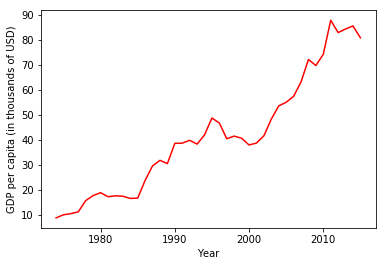

In [2]:
df = pd.read_csv('./Data/UNdata_Export_20180122_012154917.csv')
df = df[:-4]
df.drop(['Country or Area', 'Item'], axis=1, inplace=True)
df = df.set_index('Year')
df = df.iloc[::-1]
df.columns = ['GDP per capita']
df = df/1000 #For plotting thousands
df.plot(legend=False, color='r');
plt.ylabel('GDP per capita (in thousands of USD)');

### GDP per capita growth

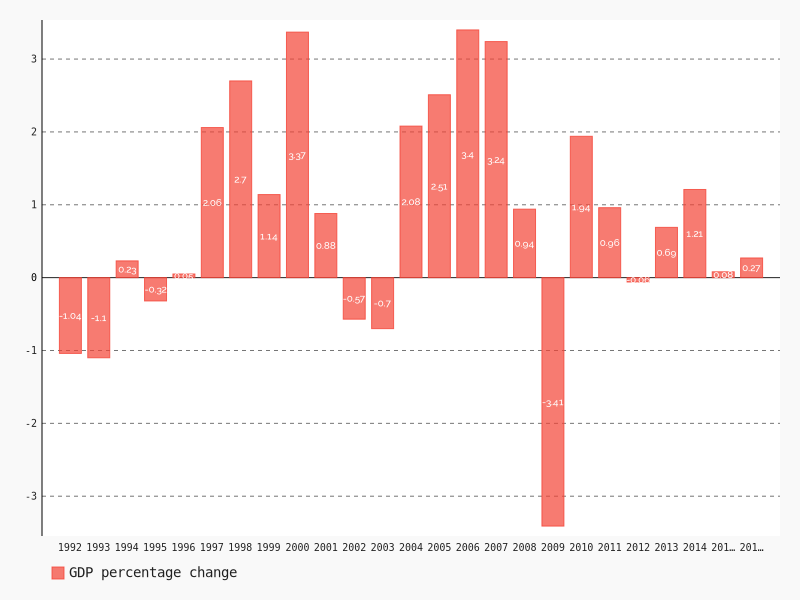

In [22]:
df1 = pd.read_excel('./Data/je-e-04.02.01.06.xlsx', sheet_name='je-e-04.02.01.06')
df1 = df1[8:-7]
df1 = df1.iloc[:,[0, 1]]
df1.columns = ['Year', 'GDP']
df1.loc[:,'GDP'] *= 100
df1 = df1.set_index('Year')

chart = pygal.Bar(legend_at_bottom=True, print_values=True, style=DefaultStyle(
                  value_font_family='googlefont:Raleway',
                  value_font_size=10,
                  value_colors=('white',)))

chart.x_labels = df1.index
chart.add('GDP percentage change', np.round(df1['GDP'].astype(np.double), decimals=2))

### Economic sectors

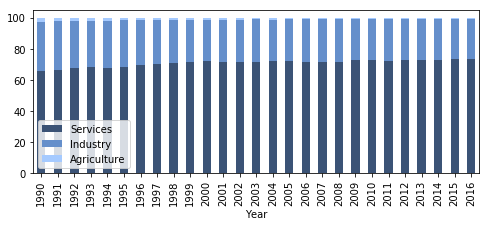

In [63]:
df2 = pd.read_excel('./Data/API_CHE_DS2_en_excel_v2.xls', sheet_name='Data')
df2 = df2.transpose()
df2 = df2[2:-1]
df2.columns = df2.iloc[0]
df2 = df2[['Indicator Name','Services, etc., value added (% of GDP)','Industry, value added (% of GDP)','Agriculture, value added (% of GDP)','Imports of goods and services (% of GDP)','Exports of goods and services (% of GDP)']]
df2.columns = ['Year', 'Services', 'Industry', 'Agriculture', 'Import', 'Export']
df2 = df2[32:]
df2 = df2.set_index('Year')
df2a = df2[['Services', 'Industry', 'Agriculture']]
df2a.plot.bar(x=df2a.index.astype(int),color=['#3b5376','#658fcb','#a5caff'],stacked=True, figsize=(8,3), edgecolor='none');

In [64]:
df2.loc[2015,['Services', 'Industry', 'Agriculture']].to_frame('2015 (% of GDP)').astype(float).round(1)

,2015 (% of GDP)
Services,73.4
Industry,25.9
Agriculture,0.7


### Import, export and debt

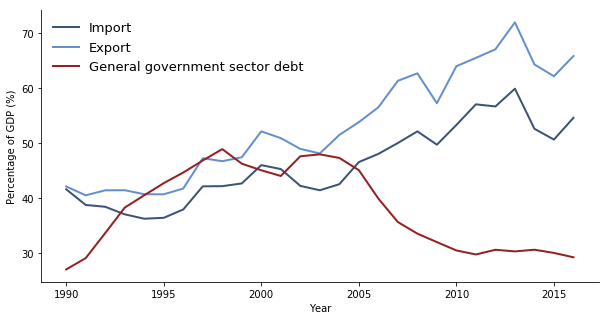

In [75]:
df2b = pd.read_excel('./Data/je-e-18.04.01.xls', sheet_name='data')
df2b = df2b.iloc[[4,11],2:]
df2b = df2b.transpose()
df2b.columns=df2b.iloc[0]
df2b.columns = ['Year', 'General government sector debt']
df2b.set_index('Year', inplace=True)
df2['General government sector debt'] = df2b['General government sector debt']
df2c = df2[['Import', 'Export','General government sector debt']]
ax = df2c.plot(figsize=(10,5), linewidth=2, color=['#3b5376','#658fcb','#932121']);
plt.ylabel('Percentage of GDP (%)');
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.yaxis.set_ticks_position('left');
ax.xaxis.set_ticks_position('bottom');
ax.legend(loc='upper left', frameon=False, fontsize=13);


### Cantonal GDP per capita

In [77]:
pd.options.mode.chained_assignment = None
df3 = pd.read_excel('./Data/je-e-04.02.06.03.xlsx', sheet_name='cantonal GDP per capita')
df3 = df3.transpose()
df3.columns=df3.iloc[0]
df3.set_index('Canton', inplace=True)
df3 = df3.iloc[1:,3:30]
df3 = df3.transpose()
df3b = df3[['2015p']]
df3b.sort_values('2015p', inplace=True, ascending=False)
pd.DataFrame(df3b.index.values[0:4], columns=['Top 4 for GDP per capita in 2015'], index=[1,2,3,4])


,Top 4 for GDP per capita in 2015
1,Basel-Stadt
2,Zug
3,Geneva
4,Zurich


In [82]:
ch_chart = pygal.maps.ch.Cantons()
ch_chart.title = 'GDP per canton'
cantons = ['kt-zh','kt-be','kt-lu','kt-ur','kt-sz','kt-ow','kt-nw','kt-gl','kt-zg','kt-fr','kt-so','kt-bs','kt-bl','kt-sh','kt-ar','kt-ai','kt-sg','kt-gr','kt-ag','kt-tg', 'kt-ti', 'kt-vd', 'kt-vs', 'kt-ne', 'kt-ge', 'kt-ju']

df3c = df3[['2015p']]
values = df3c['2015p'].values
values = values[:-1].astype(float).round()

d = {}
for i in range(len(cantons)):
    d[cantons[i]] = values[i]
    
ch_chart.add('GDP per capita (in CHF)', d)
ch_chart.render_to_file('cantonMap.svg', legend_at_bottom=True)

from IPython.display import SVG, HTML
ex = """<!DOCTYPE html>
<html>
    <body>

    <object data="cantonMap.svg" type="image/svg+xml">
      <img src="yourfallback.jpg" />
    </object>

    </body>
</html>"""
display(HTML(ex))

### Contributions of industries

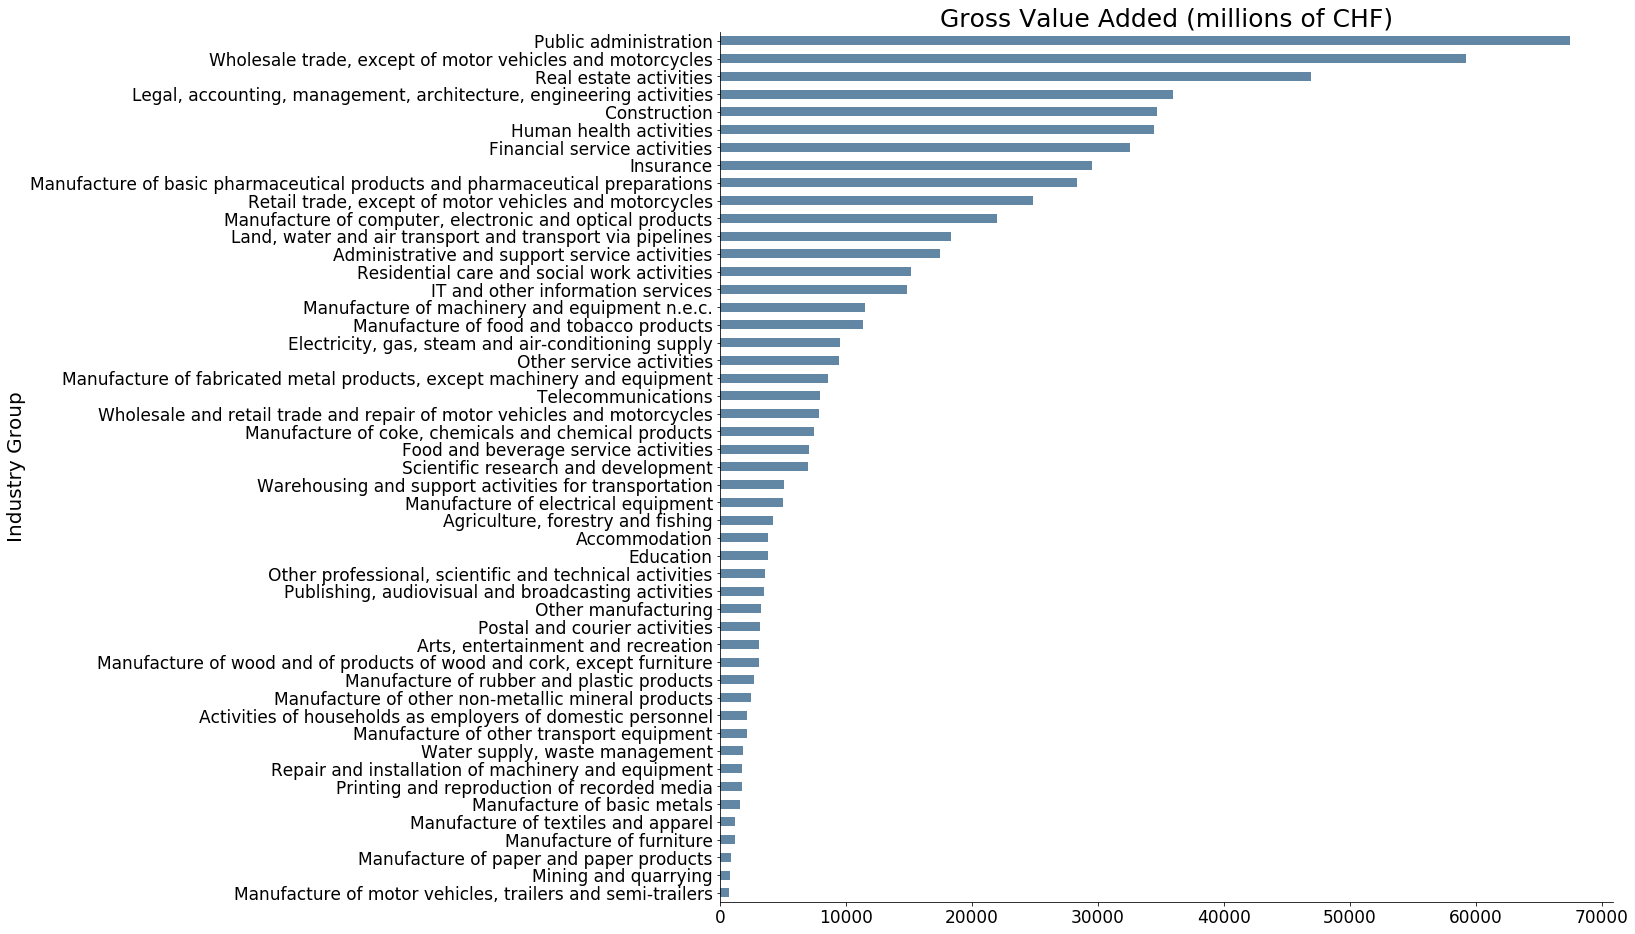

In [85]:
df4 = pd.read_excel('./Data/je-e-04.02.03.01.xlsx', sheet_name='Industries C')
df4 = df4.iloc[4:-9,[2,76]]
df4.columns = ['Industry','GVA in 2015']
df4.set_index('Industry', inplace=True)
df4.sort_values('GVA in 2015', inplace=True)
ax = df4.plot(kind='barh', figsize=(16,16), fontsize=17, color='#6287a4');
plt.ylabel('Industry Group',fontsize=20)
ax.spines['top'].set_visible(False);
ax.spines['right'].set_visible(False);
ax.yaxis.set_ticks_position('left');
ax.xaxis.set_ticks_position('bottom');
ax.legend().set_visible(False)
plt.title('Gross Value Added (millions of CHF)', fontsize=25);

## Final Infographic

![title](infoGraph1.jpg)